In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestRegressor

# importing linear regression model from linear model package
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

# metrics are used to find accuracy or error
from sklearn import metrics, utils

import statsmodels.api as sm


# utility packages
import math
import numpy as np
import re

import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [2]:
def compare_results_with_groundtruth(y_true, y_pred, Model_name):
    
    print("Prediction Model :", Model_name)
    
    print("\nMSE :", metrics.mean_squared_error(y_true, y_pred))
    
    print("\nMAE :", metrics.mean_absolute_error(y_true, y_pred))
    
    print("\nRMSE :", metrics.mean_squared_error(y_true, y_pred, squared=False))
    
    print("\nRSquared Error :", metrics.r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print("\nMean Absolute Percentage Error : {:0.2f}%".format(mape))
    print('Accuracy derived frm MAPE = {:0.2f}%.'.format(accuracy))

In [3]:
df = pd.read_csv("./ParisHousing.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

## Exploratory data analysis (ETA)

In [5]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [6]:
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [7]:
df['pricePerSquare'] = df['price'] / df['squareMeters']

In [8]:
px.imshow(df.corr(), text_auto=True, height = 1000, width=1000, color_continuous_scale=["red", "green", "blue"])

### Observation : 

The above heatmaps shows teh correlation between all the features. We could see that no of the features has good correlation with the price except the squqre meters of the house.

In [9]:
px.histogram(df, x = "numberOfRooms", title="No of Rooms in the house", nbins = 200)

In [10]:
px.histogram(df, x = "squareMeters", title="Square Meter", nbins = 300)

In [11]:
px.histogram(df, x = "hasYard", title="Has Yard vs has Pool", nbins = 10, color = 'hasPool')

In [12]:
px.histogram(df, x = "hasPool", title="Has Yard vs has Pool", nbins = 10, color = 'hasStorageRoom')

In [13]:
px.scatter(df, y = "squareMeters", x = 'price', title="Square Meters vs Price")

### Observation : 

We could clearly see that the price is linearly proportional to that of squared meteres.

Let us see if price per square is also making the same pattern

In [14]:
px.scatter(df, y = "squareMeters", x = "pricePerSquare", title="Accelerometer Readings based on Wrist")

###### We could infer from above two plots that price is a linear variable heaily dependig on area of the house

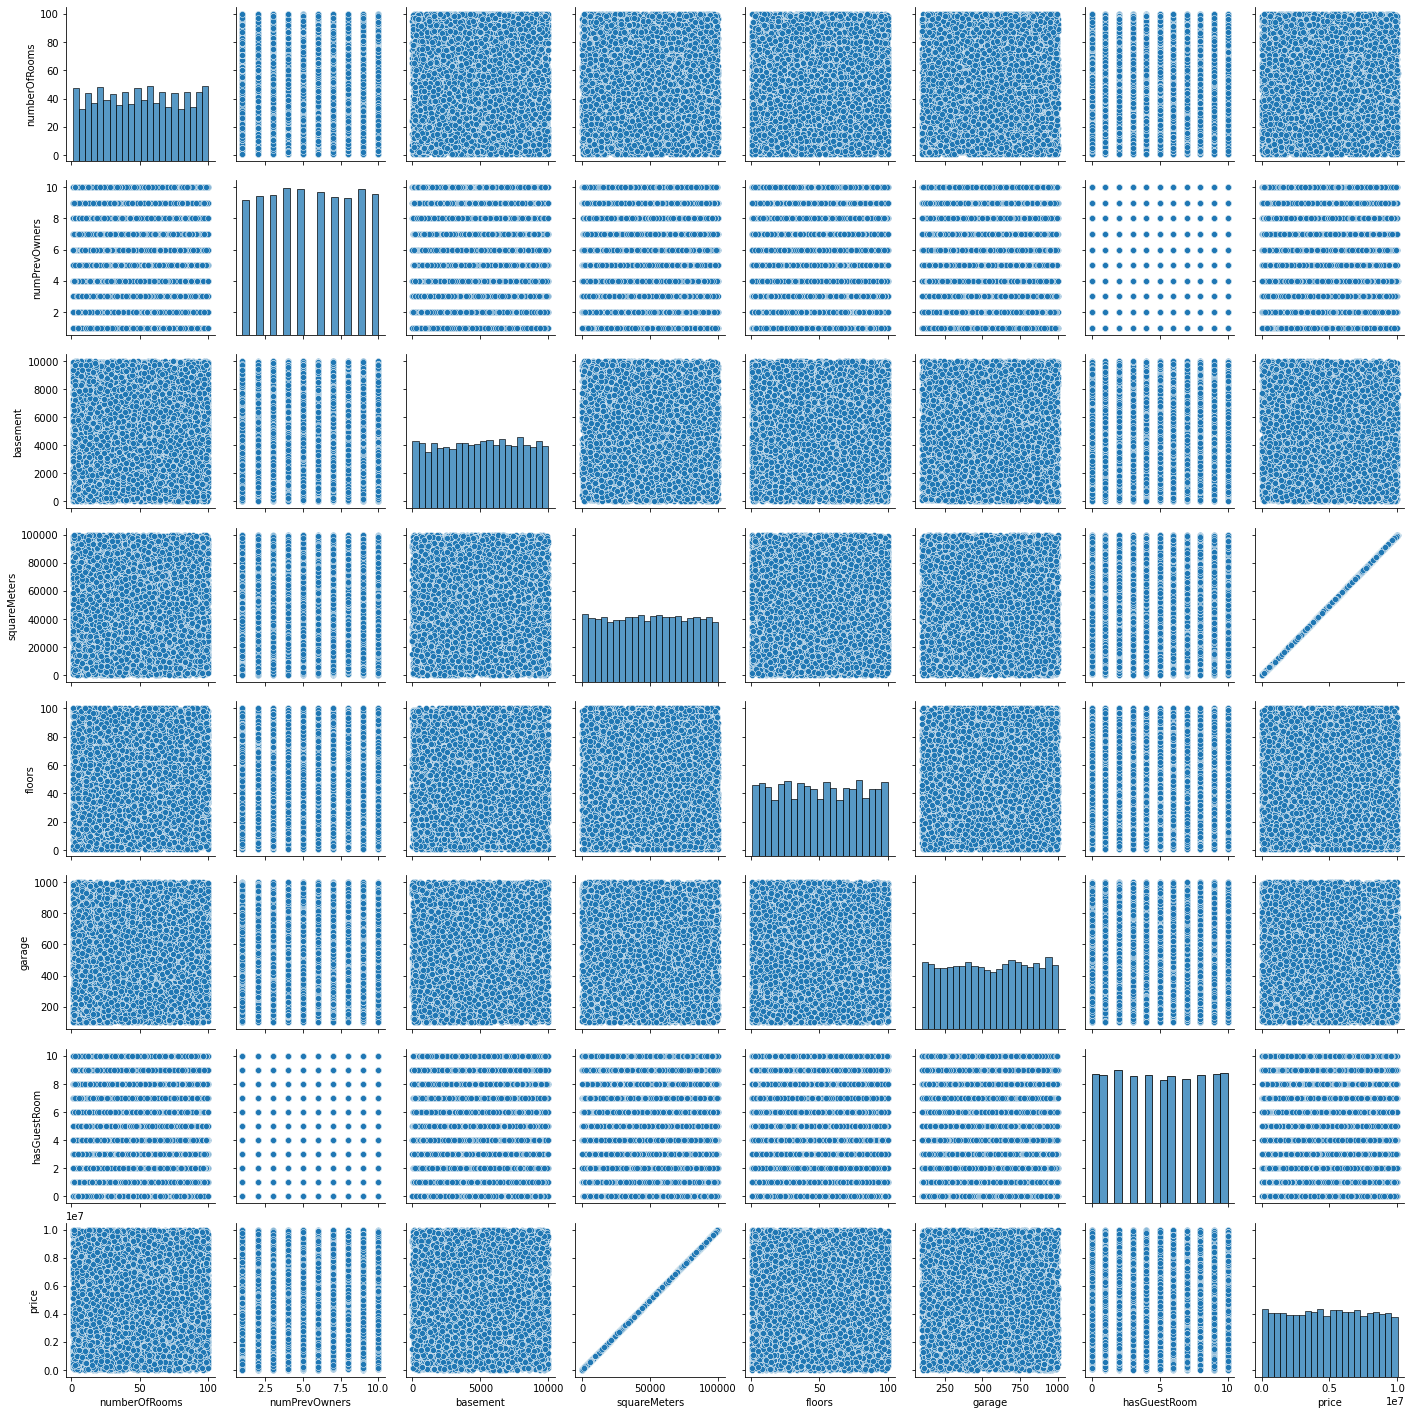

In [15]:
mini_df = df[['numberOfRooms', 'numPrevOwners', 'basement','squareMeters', 'floors', 'garage', 'hasGuestRoom', 'price']]

sns.pairplot(mini_df)

## Feature Engineering

In [16]:
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  \
0      4313   9005     956               0             7  7559081.5   
1      3653   2436     128               1             2  8085989.5   
2      2937   8852     135               1             9  5574642.1   
3       659   7141     359               0             3  3232561.2   
4      8435   2429     292               1             4  7055052.0   

   pricePerSquare  
0      100.089794  
1      100.110058  
2      100.061784  
3      100.029744  
4      100.172543

In [17]:
X = df.drop(["price", "pricePerSquare"], axis = 1)
Y = df["price"]

In [18]:
# Standardize the data to have a mean of ~0 and a variance of 1
Std_scaler = StandardScaler()
X_std = Std_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

In [19]:
X_std.head()

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0      0.891562      -1.643518 -1.017554  1.006421  0.440453 -1.408453   
1      1.073956      -0.394180  0.982749  1.006421  1.652041 -0.373880   
2      0.203033       0.265193 -1.017554  1.006421 -1.082685 -0.543643   
3     -0.610092      -0.116549 -1.017554 -0.993620 -1.532703 -0.768361   
4      0.714521      -1.088257  0.982749  1.006421  1.375106 -0.419941   

   cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0      -0.874027       0.867593 -0.052484   -0.998202             1.0002   
1       0.866993       0.167441  1.021904    1.001802            -0.9998   
2       0.170585       0.867593  1.666537   -0.998202            -0.9998   
3       1.563401      -0.532710  0.699588   -0.998202             1.0002   
4      -0.874027       0.517517 -1.664066    1.001802            -0.9998   

   basement     attic    garage  hasStorageRoom  hasGuestRoom  
0 -0.250333  1.374130  1.537488       -1.006018      0.631373  
1 -0.479772 -0.895592 -1.622370        0.994018     -0.942810  
2 -0.728678  1.321265 -1.595657        0.994018      1.261046  
3 -1.520589  0.730080 -0.740816       -1.006018     -0.627973  
4  1.182616 -0.898010 -0.996505        0.994018     -0.313136

In [20]:
# Making 20% of samples as test set
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, random_state=101, test_size=0.20)

In [21]:
X_train.head()

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
6861     -1.312662       1.410420  0.982749 -0.993620 -0.944218  0.834626   
9881      0.720325       1.271604  0.982749 -0.993620  0.855855 -0.823420   
4536     -1.698267       0.438712  0.982749  1.006421  0.094286  0.421735   
8430     -0.290069       1.653346  0.982749  1.006421  1.617424  1.100061   
6765      0.201609       1.271604 -1.017554  1.006421  1.063555 -0.928263   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
6861      -1.222230       0.517517 -1.019433    1.001802            -0.9998   
9881       0.170585      -0.532710  0.377271   -0.998202            -0.9998   
4536      -1.222230       0.517517  0.269833    1.001802             1.0002   
8430      -0.177619       0.517517  1.129343    1.001802             1.0002   
6765       1.563401       1.217669  0.484710   -0.998202             1.0002   

      basement     attic    garage  hasStorageRoom  hasGuestRoom  
6861  0.954915 -0.483386 -0.034809        0.994018      0.316537  
9881 -0.412330  0.431551 -0.141664        0.994018      0.946210  
4536  1.384244  0.158590  1.098619        0.994018     -1.257646  
8430 -0.485681  1.024118 -0.168378       -1.006018     -1.257646  
6765  0.747725 -1.706873  1.117700       -1.006018     -1.257646

### Problem Statement :


### Supervised Algo - Model building

### Linear Regression

In [22]:
# Initialization
LR_model = LinearRegression()

# Model Training
LR_model.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred_LR = LR_model.predict(X_test)

# Benchmarking/Evaluation on test data
compare_results_with_groundtruth(y_true=Y_test, y_pred = Y_pred_LR, Model_name="Linear Regression")

Prediction Model : Linear Regression

MSE : 3685439.0612538587

MAE : 1497.916353665518

RMSE : 1919.7497392248445

RSquared Error : 0.9999995527145453

Mean Absolute Percentage Error : 0.10%
Accuracy derived frm MAPE = 99.90%.


In [23]:
X_train_sm = sm.add_constant(X_train)
est = sm.OLS(Y_train, X_train_sm)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.155e+09
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:47:33   Log-Likelihood:                -71714.
No. Observations:                8000   AIC:                         1.435e+05
Df Residuals:                    7983   BIC:                         1.436e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.993e+06     21.17

### Observation : 

We could see that numberOfRooms,hasGuestRoom, hasStorageRoom, basement, made, cityPartRange are the features whose p-value is greater than the significant value of 0.05. Hence these features are troublinig the model by adding noise.

If we remove those features, although Adjusted R Square value may go down, it will still help us in producing better predictions.

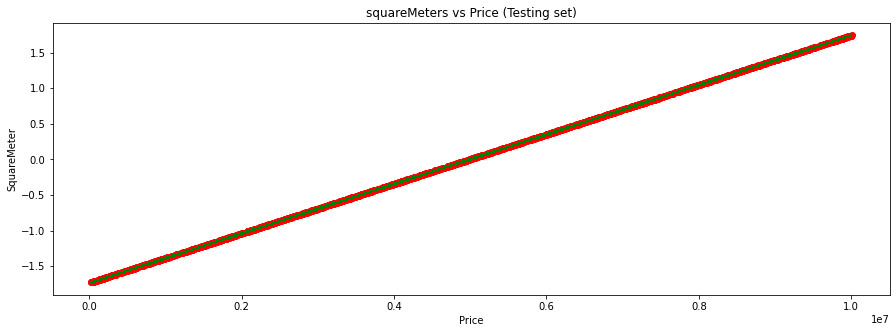

In [24]:
fig = plt.figure(figsize=(15,5))
plt.scatter(y=X_test['squareMeters'], x=Y_test, color = "red")
plt.plot(Y_pred_LR, X_test['squareMeters'], color = "green")
plt.title("squareMeters vs Price (Testing set)")
plt.xlabel("Price")
plt.ylabel("SquareMeter")
plt.show()

### Decision Tree Algorithm

In [25]:
# Initialization
Dtree = DecisionTreeRegressor(random_state=42)

# Model Training
Dtree.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred_Dtree = Dtree.predict(X_test)

# Benchmarking/Evaluation on test data
compare_results_with_groundtruth(y_true=Y_test, y_pred = Y_pred_Dtree, Model_name="Decision Tree")

Prediction Model : Decision Tree

MSE : 28634389.554060075

MAE : 4250.9376000000075

RMSE : 5351.111057907514

RSquared Error : 0.9999965247706614

Mean Absolute Percentage Error : 0.25%
Accuracy derived frm MAPE = 99.75%.


### Random Forest Algorithm

In [26]:
# Initialization
n_estimator = 1000 # N estimators is nothing but the no of trees in the forest that we have created
RF_reg = RandomForestRegressor(n_estimators = n_estimator, 
                                max_features="sqrt",
                                n_jobs=-1, 
                                oob_score=False,
                                random_state=40,
                                min_samples_leaf=0.00001)
 
# Model Training
RF_reg.fit(X_train, Y_train)
 
# performing predictions on the test dataset
Y_pred_RF = RF_reg.predict(X_test)

# Benchmarking/Evaluation on test data
compare_results_with_groundtruth(y_true=Y_test, y_pred = Y_pred_RF, 
                                 Model_name="Random_Forest_with_{}_trees".format(n_estimator))

Prediction Model : Random_Forest_with_1000_trees

MSE : 63813262483.601295

MAE : 187821.14307835003

RMSE : 252612.87077977895

RSquared Error : 0.9922552662923013

Mean Absolute Percentage Error : 27.87%
Accuracy derived frm MAPE = 72.13%.


In [27]:
# Get numerical feature importances
importances = list(RF_reg.feature_importances_)

column_names = list(X_train.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(column_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: squareMeters         Importance: 0.92
Variable: numberOfRooms        Importance: 0.01
Variable: floors               Importance: 0.01
Variable: cityCode             Importance: 0.01
Variable: made                 Importance: 0.01
Variable: basement             Importance: 0.01
Variable: attic                Importance: 0.01
Variable: garage               Importance: 0.01
Variable: hasYard              Importance: 0.0
Variable: hasPool              Importance: 0.0
Variable: cityPartRange        Importance: 0.0
Variable: numPrevOwners        Importance: 0.0
Variable: isNewBuilt           Importance: 0.0
Variable: hasStormProtector    Importance: 0.0
Variable: hasStorageRoom       Importance: 0.0
Variable: hasGuestRoom         Importance: 0.0


In [28]:
# list of x locations for plotting
x_values = list(range(len(importances)))

fig = px.bar(x=x_values, y=importances)

fig.update_layout(title_text='Feature Importance', xaxis_title="Variables", yaxis_title="Importance", xaxis=dict(
                 tickmode = 'array',
        tickvals = x_values,
        ticktext = column_names))

fig.show()

### Observation : 

Random Forest also suggest that only *Squaremeters* feature has the most importance where it alone holds 92% of importance while predicting the Dependant column *price*. The same was dErived in the Null hypothesis test in the Linear Regression session using stats model API.

### ----------------------------END of Notebook-----------------------------------------------